# Test Assignment Kyle Davis

In [1]:
# imports
import numpy as np
import itertools
from matplotlib import pyplot as plt
from astropy.nddata import Cutout2D
from astropy.io import fits
import photutils

# Load the FITS file

In [2]:
file = fits.open('test.fits')

In [3]:
file.info()

Filename: test.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     269   (256, 256)   float32   


In [4]:
data = file[0].data

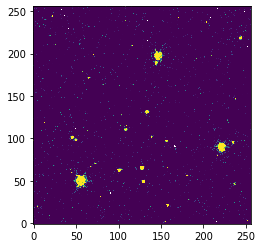

In [5]:
plt.imshow(data, origin='lower', vmin=10, vmax=30)

# Finding the brightest pixel

Honestly, I used ds9, but here's a dumb loop that checks for the brightest pixel. Also, I think this might not technically be the brightest SOURCE, since to do that I should actually sum the counts from every adjacent pixel of the same source to find the total. But I think here, this is the brightest

In [6]:
max_found = 0
i_max = 0
j_max = 0
for i,j in itertools.product(range(256), range(256)):
    if data[i][j] > max_found:
        max_found = data[i][j]
        i_max = i
        j_max = j
        
print(max_found)
print(i_max)
print(j_max)

17760.541
50
56


In [7]:
data[i_max, j_max]

17760.541

# Crop to Source

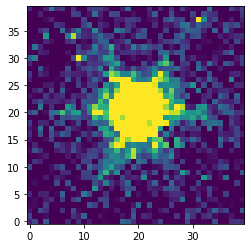

In [8]:
image_crop = data[i_max-20:i_max+20, j_max-20:j_max+20]
plt.imshow(image_crop, origin='lower', vmin=0, vmax=30)

## Save

In [1]:
file2 = fits.PrimaryHDU(image_crop)
file2.writeto('test2.fits', overwrite=True)

NameError: name 'fits' is not defined

# Measure the Centroid

In [10]:
xc, yc = photutils.centroids.centroid_sources(data, j_max, i_max)
print(xc[0])
print(yc[0])

55.78048699494043
50.164588079285885


In [12]:
file.close()